In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
files = files.upload()

Saving orders.xlsx to orders.xlsx


In [3]:
# Load the data and get the top 5 rows
df = pd.read_excel("orders.xlsx")
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,95407,95407,1.0,1,1.0,1.0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,85007,85007,1.0,1,1.0,1.0
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,30305-2646,30305-2646,1.0,1,1.0,1.0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,28562,28562,1.0,1,1.0,1.0
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,92324,92324,1.0,1,1.0,1.0


In [4]:
# Shape of the data
df.shape

(10000, 15)

In [5]:
# Check the data types for each columns
df.dtypes

order_id                              object
customer_id                           object
merchant_id                           object
order_amount                         float64
checkout_started_at           datetime64[ns]
credit_decision_started_at    datetime64[ns]
approved_for_installments               bool
customer_credit_score                  int64
customer_age                           int64
customer_billing_zip                  object
customer_shipping_zip                 object
paid_installment_1                   float64
paid_installment_2                     int64
paid_installment_3                   float64
paid_installment_4                   float64
dtype: object

In [6]:
# Get the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  object        
 1   customer_id                 10000 non-null  object        
 2   merchant_id                 10000 non-null  object        
 3   order_amount                10000 non-null  float64       
 4   checkout_started_at         10000 non-null  datetime64[ns]
 5   credit_decision_started_at  10000 non-null  datetime64[ns]
 6   approved_for_installments   10000 non-null  bool          
 7   customer_credit_score       10000 non-null  int64         
 8   customer_age                10000 non-null  int64         
 9   customer_billing_zip        9989 non-null   object        
 10  customer_shipping_zip       9977 non-null   object        
 11  paid_installment_1          9998 non-null   float64    

In [7]:
# Columns of the data
df.columns

Index(['order_id', 'customer_id', 'merchant_id', 'order_amount',
       'checkout_started_at', 'credit_decision_started_at',
       'approved_for_installments', 'customer_credit_score', 'customer_age',
       'customer_billing_zip', 'customer_shipping_zip', 'paid_installment_1',
       'paid_installment_2', 'paid_installment_3', 'paid_installment_4'],
      dtype='object')

In [8]:
# Get the count of empty values of each columns
df.isna().sum()

order_id                        0
customer_id                     0
merchant_id                     0
order_amount                    0
checkout_started_at             0
credit_decision_started_at      0
approved_for_installments       0
customer_credit_score           0
customer_age                    0
customer_billing_zip           11
customer_shipping_zip          23
paid_installment_1              2
paid_installment_2              0
paid_installment_3              4
paid_installment_4            577
dtype: int64

In [9]:
df.describe()

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
count,10000.000000,10000.000000,10000.000000,9998.0,10000.000000,9996.000000,9423.000000
mean,146.252272,613.435900,33.544300,1.0,0.977900,0.959684,0.940359
std,167.883106,92.555118,11.933729,0.0,0.147016,0.196709,0.236834
min,4.950000,1.000000,18.000000,1.0,0.000000,0.000000,0.000000
25%,64.000000,562.000000,24.000000,1.0,1.000000,1.000000,1.000000
50%,90.765000,611.000000,30.000000,1.0,1.000000,1.000000,1.000000
75%,155.000000,664.000000,40.250000,1.0,1.000000,1.000000,1.000000
max,1936.000000,836.000000,89.000000,1.0,1.000000,1.000000,1.000000


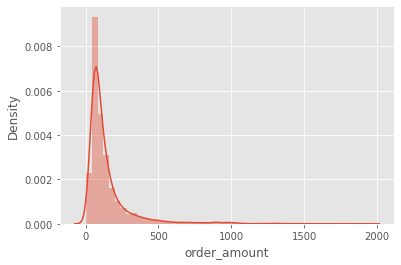

In [10]:
# Plot a distribution graph for order amount
sns.distplot(df["order_amount"])

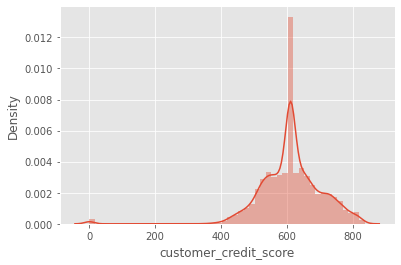

In [11]:
# Plot a distribution graph for customer credit score
sns.distplot(df["customer_credit_score"])

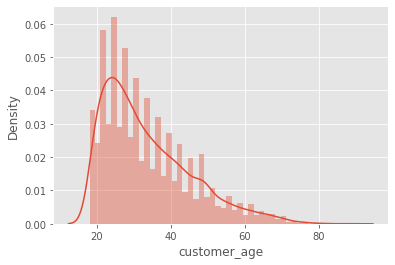

In [12]:
# Plot a distribution graph for customer age
sns.distplot(df["customer_age"])

Observation:

We can see there are total 15 columns, all of them are self explanatory.
We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

Observation:

We need to identify columns that contain a single Value and delete that Columns.
We need to identify columns which is not useful in our model and delete that columns.

In [13]:
print(df.nunique())

order_id                       9991
customer_id                    8932
merchant_id                     105
order_amount                   4250
checkout_started_at           10000
credit_decision_started_at     9993
approved_for_installments         1
customer_credit_score           448
customer_age                     66
customer_billing_zip           5529
customer_shipping_zip          5488
paid_installment_1                1
paid_installment_2                2
paid_installment_3                2
paid_installment_4                2
dtype: int64


Observation: 

One way to deal with categorical variables like zip codes is to split them into dummy variables. This is what “One Hot Encoder” does. When you have a categorical variable with 5000 unique values, dummy variables really won’t be much help, unfortunately. Using “One Hot Encoder” on zip code means you’ll create 5000 new independent variables.
If you have 1-2 people in a zip code and one is a customer, the penetration rate would be extremely high (50%). This high number doesn’t mean that the zip code is fertile grounds for prospecting. Maybe it is. Maybe it isn’t. If you only have two people in your sample, the statistic really has no value.

In [14]:

# Dropping order_id, customer_id, merchant_id, checkout_started_at, credit_decision_started_at, approved_for_installments, 
# customer_billing_zip, customer_shipping_zip
df = df.drop(columns = ["order_id", "customer_id", "merchant_id", "checkout_started_at", "credit_decision_started_at", 
                        "approved_for_installments", "customer_billing_zip", "customer_shipping_zip"])

In [15]:
# Look at our new dataframe
df

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,147.20,626,26,1.0,1,1.0,1.0
1,69.95,603,20,1.0,1,1.0,1.0
2,45.00,648,41,1.0,1,1.0,1.0
3,164.00,625,33,1.0,1,1.0,1.0
4,69.17,438,18,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...
9995,63.66,613,37,1.0,1,1.0,1.0
9996,83.89,771,34,1.0,1,1.0,1.0
9997,95.25,611,45,1.0,1,1.0,1.0
9998,79.95,611,18,1.0,1,1.0,1.0


In [16]:
# Finding the Outliers for customer_credit_score
df[(df["customer_credit_score"] > 900) | (df["customer_credit_score"] < 300)]

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
77,49.80,1,71,1.0,1,1.0,1.0
125,116.99,1,34,1.0,1,1.0,1.0
469,579.58,1,28,1.0,1,1.0,1.0
678,125.21,1,60,1.0,1,1.0,1.0
888,90.00,1,40,1.0,1,1.0,1.0
1187,130.90,1,48,1.0,1,1.0,1.0
1235,170.19,1,62,1.0,1,1.0,1.0
1497,131.87,1,30,1.0,1,1.0,1.0
1502,139.01,1,33,1.0,1,1.0,1.0
1766,820.00,1,38,1.0,1,1.0,1.0


In [17]:
# Removing the outliers with the mean
df["customer_credit_score"] = df["customer_credit_score"].replace(1, np.mean(df.customer_credit_score))

In [18]:
# After adjusting the outliers in our dataframe
df

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,147.20,626.0,26,1.0,1,1.0,1.0
1,69.95,603.0,20,1.0,1,1.0,1.0
2,45.00,648.0,41,1.0,1,1.0,1.0
3,164.00,625.0,33,1.0,1,1.0,1.0
4,69.17,438.0,18,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...
9995,63.66,613.0,37,1.0,1,1.0,1.0
9996,83.89,771.0,34,1.0,1,1.0,1.0
9997,95.25,611.0,45,1.0,1,1.0,1.0
9998,79.95,611.0,18,1.0,1,1.0,1.0


In [19]:
# Assumption: Here we are taking null value as 0 (Installment not made)
df = df.fillna({"paid_installment_1": 0})
df = df.fillna({"paid_installment_2": 0})
df = df.fillna({"paid_installment_3": 0})
df = df.fillna({"paid_installment_4": 0})

In [20]:
# Changing the data type to integer from floating 
df[["paid_installment_1", "paid_installment_2", 
   "paid_installment_3", "paid_installment_4"]] = df[["paid_installment_1", "paid_installment_2", 
                                                    "paid_installment_3", "paid_installment_4"]].astype(int)

In [21]:
# Checking the value counts for each installment
df.paid_installment_1.value_counts()

1    9998
0       2
Name: paid_installment_1, dtype: int64

In [22]:
# Print the unique values in each columns
print(df.nunique())

order_amount             4250
customer_credit_score     448
customer_age               66
paid_installment_1          2
paid_installment_2          2
paid_installment_3          2
paid_installment_4          2
dtype: int64


In [23]:
# Create a new column payment default in our dataset
df["pay_default"] = df["paid_installment_1"] + df["paid_installment_2"] + df["paid_installment_3"] + df["paid_installment_4"]

In [24]:
# Checking the value counts for default payment column
df.pay_default.value_counts()

4    8752
3     876
2     223
1     149
Name: pay_default, dtype: int64

In [25]:
df

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,pay_default
0,147.20,626.0,26,1,1,1,1,4
1,69.95,603.0,20,1,1,1,1,4
2,45.00,648.0,41,1,1,1,1,4
3,164.00,625.0,33,1,1,1,1,4
4,69.17,438.0,18,1,1,1,1,4
...,...,...,...,...,...,...,...,...
9995,63.66,613.0,37,1,1,1,1,4
9996,83.89,771.0,34,1,1,1,1,4
9997,95.25,611.0,45,1,1,1,1,4
9998,79.95,611.0,18,1,1,1,1,4


In [26]:
# Dropping paid_installment_1, paid_installment_2, paid_installment_3, paid_installment_4
df = df.drop(columns = ["paid_installment_1", "paid_installment_2", "paid_installment_3", "paid_installment_4"])

In [27]:
df

,order_amount,customer_credit_score,customer_age,pay_default
0,147.20,626.0,26,4
1,69.95,603.0,20,4
2,45.00,648.0,41,4
3,164.00,625.0,33,4
4,69.17,438.0,18,4
...,...,...,...,...
9995,63.66,613.0,37,4
9996,83.89,771.0,34,4
9997,95.25,611.0,45,4
9998,79.95,611.0,18,4


In [28]:
# Changing the numerical value into categorical with constraints
cleanup_nums = {"pay_default": {4: "no", 3: "yes", 2: "yes", 1: "yes"}}

In [29]:
# Replacing the pay default values 
df = df.replace(cleanup_nums)

In [30]:
# Checking the value counts for default payment column in terms of yes and no
print(df.pay_default.value_counts())
df

no     8752
yes    1248
Name: pay_default, dtype: int64


,order_amount,customer_credit_score,customer_age,pay_default
0,147.20,626.0,26,no
1,69.95,603.0,20,no
2,45.00,648.0,41,no
3,164.00,625.0,33,no
4,69.17,438.0,18,no
...,...,...,...,...
9995,63.66,613.0,37,no
9996,83.89,771.0,34,no
9997,95.25,611.0,45,no
9998,79.95,611.0,18,no


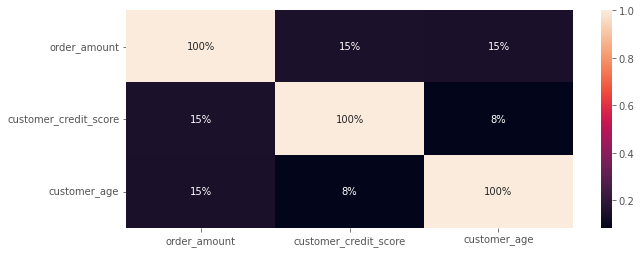

In [31]:
# Visualize the correlation
plt.figure(figsize = (10, 4))
sns.heatmap(df.corr(), annot = True, fmt = ".0%")

Observation: Out of 10,000 loans only 1248 has defaulted 

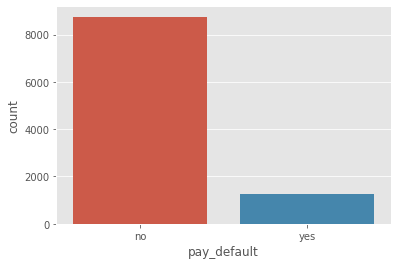

In [32]:
# Visualize the pay_default
sns.countplot(df["pay_default"])

Observation: We can see this is imbalaced dataset as minority dataset is 1248 vs majority dataset is 8752. If we apply any algorithm on this dataset we will get good accuracy but the model will not be right as we already have 8752/10000 yes in our data. 

Let's apply any model and check its accuracy

In [33]:
# Defining dependent and independent variables
X = df.iloc[:,:-1]
y = df.pay_default
X.head()

,order_amount,customer_credit_score,customer_age
0,147.20,626.0,26
1,69.95,603.0,20
2,45.00,648.0,41
3,164.00,625.0,33
4,69.17,438.0,18


In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.868


col_0,no,yes
pay_default,,
no,2150,40
yes,290,20


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       0.88      0.98      0.93      2190
         yes       0.33      0.06      0.11       310

    accuracy                           0.87      2500
   macro avg       0.61      0.52      0.52      2500
weighted avg       0.81      0.87      0.83      2500



The Accuracy Paradox: 

In such cases where class distribution is skewed, the accuracy metric is biased and not preferable.
We can see the accuracy score is very high but we can not accept this model. We need to resample the data so our model can work with other dataset 

In [38]:
# Applying SMOTE: Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [39]:
# We will aaply SMOTE on our training set
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype("float"), y_train)

In [40]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'no': 6562, 'yes': 938})
After SMOTE : Counter({'no': 6562, 'yes': 6562})


If we apply the same algorithm now after resampling the accuracy will be less but it will be more generalized for the new data 

In [41]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.6588


col_0,no,yes
pay_default,,
no,1521,669
yes,184,126


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       0.89      0.69      0.78      2190
         yes       0.16      0.41      0.23       310

    accuracy                           0.66      2500
   macro avg       0.53      0.55      0.50      2500
weighted avg       0.80      0.66      0.71      2500



Applying Decision Tree Classification to the Training set

In [43]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_predict = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(cm, "Accuracy: {:.2f}%".format(accuracy * 100))

[[1807  383]
 [ 232   78]] Accuracy: 75.40%


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       0.89      0.83      0.85      2190
         yes       0.17      0.25      0.20       310

    accuracy                           0.75      2500
   macro avg       0.53      0.54      0.53      2500
weighted avg       0.80      0.75      0.77      2500



In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (14,10), dpi=300)
from sklearn import tree
tree.plot_tree(classifier,feature_names = ["order_amount", "customer_credit_score", "customer_age"], class_names=["yes","no"],filled = True);

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_predict = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(cm, "Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_predict = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(cm, "Accuracy: {:.2f}%".format(accuracy * 100))

Let's apply Random Forest Classification algotithm in our resampled train data set

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_predict = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(cm, "Accuracy: {:.2f}%".format(accuracy * 100))

Conclusion:

Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels. We acheive the accuracy of 80.44 % using the Random Forest Classification but our model is still not perfect. We need more data so we can apply Neural Networks in our model which can give better result. 

Order Amount and Credit score is showing strong correlation with a customer’s likelihood of paying back the installments


Some of the features which is discarded

"order_id", "customer_id", "merchant_id", "checkout_started_at", "credit_decision_started_at", 
"approved_for_installments", "customer_billing_zip", "customer_shipping_zip"

One way to deal with categorical variables like zip codes is to split them into dummy variables. This is what “One Hot Encoder” does. When you have a categorical variable with 5000 unique values, dummy variables really won’t be much help, unfortunately. Using “One Hot Encoder” on zip code means you’ll create 5000 new independent variables. If you have 1-2 people in a zip code and one is a customer, the penetration rate would be extremely high (50%). This high number doesn’t mean that the zip code is fertile grounds for prospecting. Maybe it is. Maybe it isn’t. If you only have two people in your sample, the statistic really has no value.

Also columns that contain a single Value and delete that Columns. We need to identify columns which is not useful in our model and delete that columns.

What surprised you about the results/trends observed in the data?

Credi score is not sufficient parameter to check wheather customer will default of not. 

What additional data would you like to see that might help build a better installmentapproval classifier?

If we can get dataset will more features like Salary, Employment type, Home ownership, Credit enquiry, marital status, Past delinquency etc.
The classifier model can be more robust

What would be your next steps to train/build a model that we could use to make real time
customer approval decisions?

I would spend more time in feature scaling the dataset and make the necessary changes in the features like coverting them in normal distribution, Using Zip codes to convert them in longitude and lattitude then check the cities where the trancation is taking place more and using hyperparameter tuning for random forest classifier model. Also if data set is larg then we can train the data using Nural Network for each features. 